<a href="https://colab.research.google.com/github/ana-gleice/SAP-4/blob/main/Pycaret_etil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pycaret #instalar o pycaret antes das demais bibliotecas

     |████████████████████████████████| 266kB 4.0MB/s 
     |████████████████████████████████| 256kB 20.9MB/s 
     |████████████████████████████████| 14.2MB 194kB/s 
     |████████████████████████████████| 112kB 31.9MB/s 
     |████████████████████████████████| 276kB 34.4MB/s 
     |████████████████████████████████| 1.7MB 35.5MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 2.0MB 34.5MB/s 
     |████████████████████████████████| 61kB 8.0MB/s 
     |████████████████████████████████| 81kB 9.8MB/s 
     |████████████████████████████████| 6.8MB 40.2MB/s 
     |████████████████████████████████| 1.4MB 28.1MB/s 
     |████████████████████████████████| 174kB 52.2MB/s 
     |████████████████████████████████| 10.1MB 33.0MB/s 
     |████████████████████████████████| 3.1MB 27.7MB/s 
     |████████████████████████████████| 112kB 45.1M

In [2]:
import numpy as np
import pandas as pd
from pycaret.classification import *
from sklearn.model_selection import train_test_split
import pycaret
from pycaret.utils import enable_colab

In [22]:
dataset = pd.read_excel('dataset_jun.xlsx')


In [23]:
dataset = dataset[dataset.TP_ENSAIO=='Subsequente']
dataset = dataset[dataset.UF_ENSAIO=='SP']

In [24]:
dataset.head()

,DS_MARCA,NO_MODELO,NR_SERIE,NR_ANO,DT_ENSAIO,DS_METODO,TP_ENSAIO,UF_ENSAIO,DS_RESULTADO,ERRO_MEDIO_1,DESVIO_CONC_I,ERRO_MEDIO_2,DESVIO_CONC_II,ERRO_MEDIO_3,DESVIO_CONC_III,DIF_ANTERIOR_1,DIF_ANTERIOR_2,DIF_ANTERIOR_3,CLASSE
31,DRAGER,ALCOTEST 7410 PLUS RS,ARAA-0003,2019,43552,MRC Gasoso,Subsequente,SP,Aprovado,-0.0271,0.002,-0.0528,0.002,-0.0878,0.489,-0.0066,-0.0095,-0.0148,1
32,DRAGER,ALCOTEST 7410 PLUS RS,ARAA-0030,2016,42600,MRC Gasoso,Subsequente,SP,Aprovado,-0.0196,0.003,-0.0491,0.009,-0.0877,1.595,0.0066,0.0083,-0.0027,1
33,DRAGER,ALCOTEST 7410 PLUS RS,ARAA-0051,2016,42600,MRC Gasoso,Subsequente,SP,Aprovado,-0.0261,0.003,-0.0528,0.004,-0.0872,0.661,0.0042,0.0115,0.0089,1
34,DRAGER,ALCOTEST 7410 PLUS RS,ARAA-0056,2015,42206,MRC Gasoso,Subsequente,SP,Aprovado,-0.0226,0.001,-0.0507,0.002,-0.0851,1.191,0.0057,0.0126,0.0179,0
35,DRAGER,ALCOTEST 7410 PLUS RS,ARAA-0064,2019,43606,MRC Gasoso,Subsequente,SP,Aprovado,-0.0265,0.001,-0.0561,0.001,-0.0926,0.733,-0.0067,-0.0195,-0.0221,0


In [25]:
dataset.shape

(2287, 19)

In [26]:
dataset.columns

Index(['DS_MARCA', 'NO_MODELO', 'NR_SERIE', 'NR_ANO', 'DT_ENSAIO', 'DS_METODO',
       'TP_ENSAIO', 'UF_ENSAIO', 'DS_RESULTADO', 'ERRO_MEDIO_1',
       'DESVIO_CONC_I', 'ERRO_MEDIO_2', 'DESVIO_CONC_II', 'ERRO_MEDIO_3',
       'DESVIO_CONC_III', 'DIF_ANTERIOR_1', 'DIF_ANTERIOR_2', 'DIF_ANTERIOR_3',
       'CLASSE'],
      dtype='object')

In [41]:
x = dataset.drop(columns=['DS_MARCA', 'NO_MODELO', 'NR_SERIE', 'NR_ANO', 'DT_ENSAIO', 'DS_METODO', 'TP_ENSAIO', 'UF_ENSAIO', 'DS_RESULTADO', 'CLASSE'])
y = dataset.iloc[:,-1]

0    1965
1     322
Name: CLASSE, dtype: int64


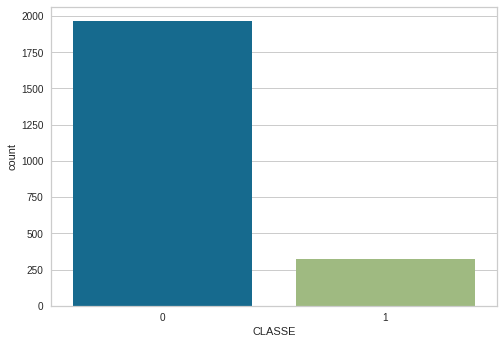

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
print(pd.Series(y).value_counts())
sns.countplot(y);
plt.savefig('unbalanced.png')

In [28]:
from imblearn.under_sampling import RandomUnderSampler

In [29]:
rus = RandomUnderSampler()
x, y = rus.fit_sample(x, y)

In [30]:
result = pd.concat([x, y], axis=1)

In [12]:
print(result)

     ERRO_MEDIO_1  DESVIO_CONC_I  ERRO_MEDIO_2  DESVIO_CONC_II  ERRO_MEDIO_3  \
0         -0.0271          0.002       -0.0528           0.002       -0.0878   
1         -0.0196          0.003       -0.0491           0.009       -0.0877   
2         -0.0261          0.003       -0.0528           0.004       -0.0872   
3         -0.0249          0.006       -0.0403           0.002       -0.0706   
4         -0.0195          0.005       -0.0408           0.003       -0.0739   
..            ...            ...           ...             ...           ...   
639       -0.0255          0.001       -0.0474           0.001       -0.0740   
640       -0.0178          0.001       -0.0306           0.002       -0.0524   
641       -0.0201          0.001       -0.0419           0.002       -0.0670   
642       -0.0144          0.001       -0.0358           0.005       -0.0562   
643       -0.0185          0.001       -0.0401           0.001       -0.0607   

     DESVIO_CONC_III  DIF_ANTERIOR_1  D

In [31]:
s = setup(result 
          ,target = 'CLASSE')

,Description,Value
0,session_id,4712
1,Target,CLASSE
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(644, 10)"
5,Missing Values,False
6,Numeric Features,9
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [32]:
compare_models(fold= 5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.7244,0.7842,0.6966,0.7174,0.7060,0.4469,0.4480,0.586
lightgbm,Light Gradient Boosting Machine,0.7244,0.7759,0.7056,0.7127,0.7086,0.4473,0.4480,0.136
gbc,Gradient Boosting Classifier,0.7222,0.7836,0.7014,0.7107,0.7052,0.4428,0.4436,0.122
ada,Ada Boost Classifier,0.7022,0.7455,0.6499,0.7029,0.6740,0.4011,0.4034,0.108
et,Extra Trees Classifier,0.6822,0.7725,0.6587,0.6683,0.6632,0.3623,0.3626,0.544
qda,Quadratic Discriminant Analysis,0.6756,0.7711,0.4718,0.7580,0.5786,0.3377,0.3645,0.018
lda,Linear Discriminant Analysis,0.6733,0.7160,0.5279,0.7105,0.6053,0.3369,0.3480,0.018
knn,K Neighbors Classifier,0.6622,0.7243,0.5464,0.6835,0.6029,0.3160,0.3246,0.138
nb,Naive Bayes,0.6556,0.7663,0.3927,0.7714,0.5193,0.2934,0.3343,0.018
ridge,Ridge Classifier,0.6356,0.0000,0.4389,0.6814,0.5329,0.2566,0.2737,0.014


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=4712, verbose=0,
                       warm_start=False)

In [33]:
lightgbm = create_model('lightgbm') # Validação Cruzada

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7111,0.6944,0.7143,0.6818,0.6977,0.4214,0.4218
1,0.7111,0.7956,0.5714,0.7500,0.6486,0.4109,0.4218
2,0.6667,0.7798,0.5714,0.6667,0.6154,0.3243,0.3273
3,0.8000,0.8155,0.7619,0.8000,0.7805,0.5970,0.5976
4,0.7333,0.7778,0.7143,0.7143,0.7143,0.4643,0.4643
5,0.7778,0.7718,0.7143,0.7895,0.7500,0.5509,0.5531
6,0.6667,0.7549,0.7273,0.6400,0.6809,0.3350,0.3380
7,0.7333,0.7609,0.7273,0.7273,0.7273,0.4664,0.4664
8,0.6889,0.6917,0.6818,0.6818,0.6818,0.3775,0.3775
9,0.8000,0.8142,0.7727,0.8095,0.7907,0.5994,0.6000


Separar os dois melhores modelos para validação cruzada e buysca de **hyperparametros**

In [34]:
# Tunar o modelo - buscar os hyperparametros
lightgbm_tuned = tune_model(lightgbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7111,0.6865,0.7143,0.6818,0.6977,0.4214,0.4218
1,0.7778,0.8095,0.7619,0.7619,0.7619,0.5536,0.5536
2,0.7111,0.7659,0.6190,0.7222,0.6667,0.4144,0.4183
3,0.7556,0.8274,0.7143,0.7500,0.7317,0.5075,0.5080
4,0.7111,0.8155,0.7619,0.6667,0.7111,0.4248,0.4286
5,0.7778,0.7659,0.7143,0.7895,0.7500,0.5509,0.5531
6,0.6889,0.7411,0.7273,0.6667,0.6957,0.3787,0.3802
7,0.7111,0.7451,0.6818,0.7143,0.6977,0.4214,0.4218
8,0.6222,0.6976,0.5909,0.6190,0.6047,0.2433,0.2436
9,0.7556,0.8221,0.7727,0.7391,0.7556,0.5114,0.5119


In [35]:
gbc = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7333,0.7202,0.7619,0.6957,0.7273,0.4675,0.4693
1,0.8000,0.8710,0.6190,0.9286,0.7429,0.5897,0.6222
2,0.6667,0.7520,0.6190,0.6500,0.6341,0.3284,0.3287
3,0.7778,0.8115,0.7143,0.7895,0.7500,0.5509,0.5531
4,0.7556,0.8194,0.7619,0.7273,0.7442,0.5104,0.5109
5,0.7333,0.7877,0.6667,0.7368,0.7000,0.4611,0.4629
6,0.7333,0.8083,0.7727,0.7083,0.7391,0.4675,0.4693
7,0.7333,0.8320,0.6818,0.7500,0.7143,0.4653,0.4672
8,0.6889,0.7213,0.6818,0.6818,0.6818,0.3775,0.3775
9,0.7111,0.8043,0.7727,0.6800,0.7234,0.4236,0.4274


In [36]:
gbc_tuned = tune_model(gbc)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7778,0.7202,0.7619,0.7619,0.7619,0.5536,0.5536
1,0.6667,0.7937,0.5714,0.6667,0.6154,0.3243,0.3273
2,0.6667,0.7619,0.6190,0.6500,0.6341,0.3284,0.3287
3,0.8000,0.8591,0.8095,0.7727,0.7907,0.5994,0.6000
4,0.8000,0.8512,0.8571,0.7500,0.8000,0.6018,0.6071
5,0.7556,0.7817,0.6667,0.7778,0.7179,0.5045,0.5092
6,0.7333,0.7451,0.7727,0.7083,0.7391,0.4675,0.4693
7,0.6667,0.7490,0.5909,0.6842,0.6341,0.3310,0.3340
8,0.6889,0.7312,0.6364,0.7000,0.6667,0.3762,0.3777
9,0.7333,0.7925,0.7273,0.7273,0.7273,0.4664,0.4664


In [40]:
plot_model(lightgbm, save=True)

'AUC.png'

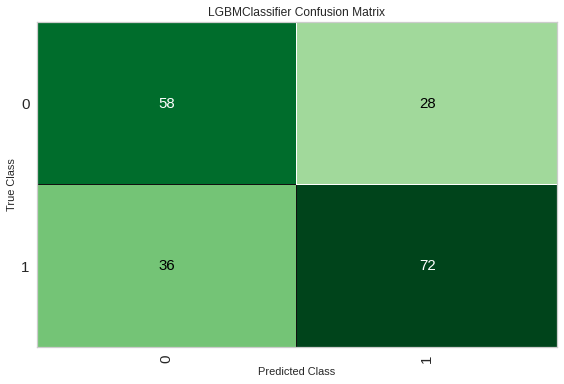

In [39]:
plot_model(lightgbm, 'confusion_matrix')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2

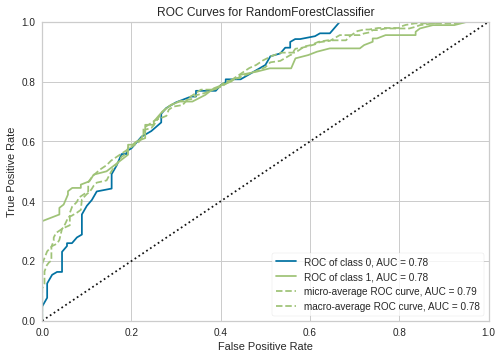

In [ ]:
plot_model(rf)


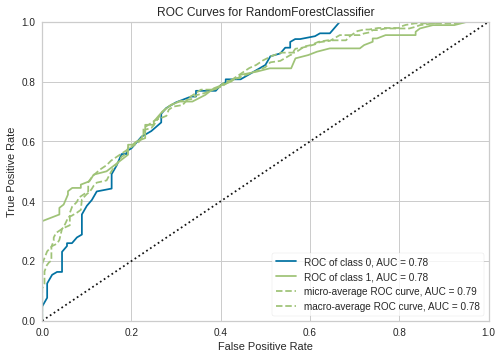

error: ignored